# Exploratory Data Analysis & DataViz on Covid19 [Italy]
https://github.com/pcm-dpc/COVID-19

### Downloading Data

In [1]:
# Protezione Civile Data -- > You should do it once a day in order to get updates
!git clone https://github.com/pcm-dpc/COVID-19.git
# OpenPolis Geojson Italy Data --> You can do it just one time
!git clone https://github.com/openpolis/geojson-italy.git

fatal: il percorso di destinazione 'COVID-19' esiste già e non è una directory vuota.
fatal: il percorso di destinazione 'geojson-italy' esiste già e non è una directory vuota.


### Installing missing libraries

### Importing useful libraries

In [2]:
import geojson 
from descartes import PolygonPatch
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import geopandas as gpd
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from datetime import datetime 
%matplotlib notebook 

import warnings
warnings.filterwarnings('ignore')

## Protezione Civile Data - EDA on Areas
We can take a look at the Areas highlighted by "Protezione Civile" by importing the corresponding **.geojson** file. 

In [3]:
PATH_TO_DF = "COVID-19/aree/geojson/dpc-covid19-ita-aree.geojson"
df_places = gpd.read_file(PATH_TO_DF)

You can see that we have 38 areas in total

In [4]:
# Number of Areas from "Protezione Civile" (Civil Protection)
df_places.shape[0] 

38

Let's take a look at these areas, they don't correspond to Provinces and since we have stats for each Province, we'd like to visualize Provinces as well. Go further for a possible solution

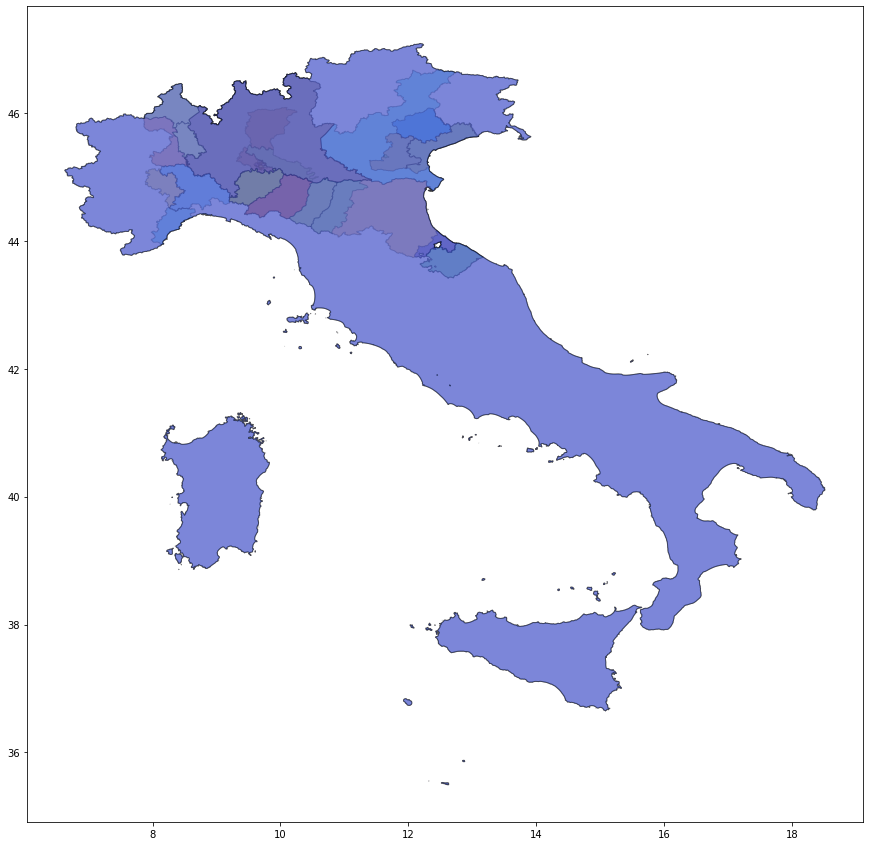

In [5]:
fig = plt.figure(figsize = (20,15)) 
ax = fig.gca() 

N = df_places.shape[0] 
nfloors = np.random.rand(N)

cmap = plt.get_cmap("jet")
colors = cmap(nfloors)

for i in range(df_places.shape[0]):
    ax.add_patch(PolygonPatch(df_places["geometry"][i],fc = colors[i], ec = 'black', alpha = 0.3))

ax.axis('scaled')
plt.savefig("italia.png")
plt.show()


## OpenPolis GeoJson
Protezione Civile's areas don't correspond to Italian provinces, a solution could be to use geographical data from OpenPolis
https://github.com/openpolis/geojson-italy

In [6]:
OP_Province = gpd.read_file("geojson-italy/geojson/limits_IT_provinces.geojson")
OP_Munic = gpd.read_file("geojson-italy/geojson/limits_IT_municipalities.geojson")
OP_Region = gpd.read_file("geojson-italy/geojson/limits_IT_regions.geojson")

As you can see, now we have our Provinces

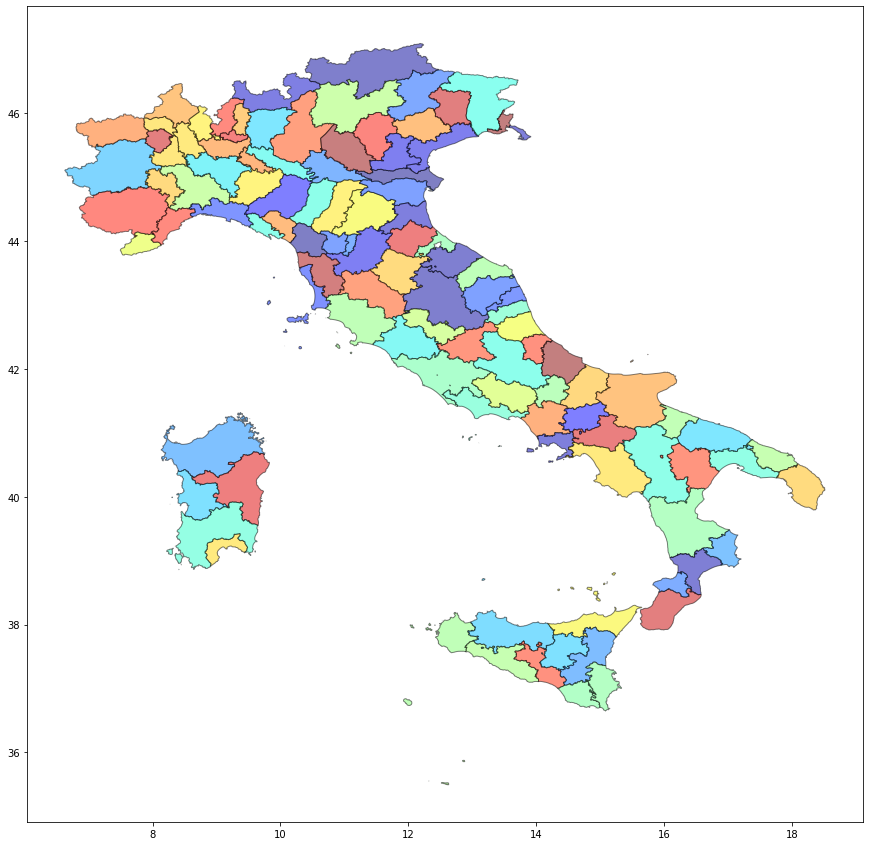

In [7]:
fig = plt.figure(figsize = (20,15)) 
ax = fig.gca() 

N = OP_Province.shape[0] 
nfloors = np.random.rand(N)

cmap = plt.get_cmap("jet")
colors = cmap(nfloors)

for i in range(OP_Province.shape[0]):
    ax.add_patch(PolygonPatch(OP_Province["geometry"][i],fc = colors[i], ec = 'black', alpha = 0.5))

ax.axis('scaled')
plt.savefig("italia_open_polis.png")
plt.show()

## EDA Json Province

Let's clean Protezione Civile's Data a little and insert a "day count" variable for plotting

In [8]:
PATH_PROVINCE = "COVID-19/dati-json/dpc-covid19-ita-province.json"
df_province = pd.read_json(PATH_PROVINCE)
df_province["n_giorno"] = df_province["data"].apply(lambda x :(datetime.fromisoformat(x[:10]).timestamp() - datetime.fromisoformat(df_province.data[0][:10]).timestamp())/(86400.0))
df_province.drop(df_province[df_province["sigla_provincia"] == ""].index, inplace = True)
df_province = df_province.reset_index(drop = True)

Data per Province look like this

In [9]:
df_province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,n_giorno
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0.0,0.0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0.0,0.0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0.0,0.0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0.0,0.0
4,2020-02-24 18:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,0.0,0.0


Similarly for Data per Region

In [10]:
PATH_REGION = "COVID-19/dati-json/dpc-covid19-ita-regioni.json"
df_region = pd.read_json(PATH_REGION)
df_region["n_giorno"] = df_region["data"].apply(lambda x :(datetime.fromisoformat(x[:10]).timestamp() - datetime.fromisoformat(df_region.data[0][:10]).timestamp())/(86400.0))

Let's take a glance at these data as well

In [11]:
df_region.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,n_giorno
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,0.0
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0.0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,0.0
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,0.0
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,0.0


## Plotting Provinces
Now it's time to become familiar with **.geojson** data format, let's write a few chunks and plot [Patches](https://sgillies.net/2010/04/07/descartes.html). 

In [12]:
def plot_province(prov_name):
    
    try:
        data_pc = df_province[df_province["denominazione_provincia"] == prov_name]
        data_munic = OP_Munic[OP_Munic["name"] == prov_name]
        data_plot = OP_Province[OP_Province["prov_name"] == prov_name]
        data_region = OP_Region[OP_Region["reg_name"] == data_plot["reg_name"].iloc[0]]
        
        fig = plt.figure(figsize = (10,5)) 
        ax = fig.gca() 

        ax.add_patch(PolygonPatch(data_region["geometry"].iloc[0], fc = "#27496d", alpha = 0.9))
        ax.add_patch(PolygonPatch(data_plot["geometry"].iloc[0], fc = "#0c7b93", alpha = 0.8))
        #ax.add_patch(PolygonPatch(data_munic["geometry"].iloc[0], fc = "#00a8cc")) #Uncomment to plot municipality
        
        ax.axis("scaled")
        ax.legend(["Region", "Province"])
        
        plt.title(prov_name + " ("+ data_region.reg_name.iloc[0] + ")", fontsize = 15)
        
    except:
        print("Can't find " + prov_name + " in these Data")
        

You can type the name of the Province directly and get the corresponding Patch

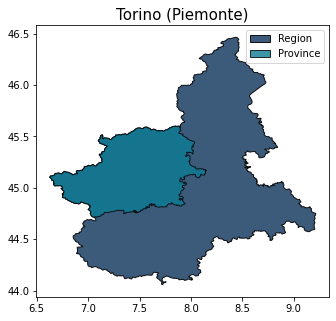

In [13]:
plot_province("Torino")

## More Stats per Province

Here you are with a report for the chosen Province. 


In [23]:
def report_by_province(prov_name):
    
    try:
        data_pc = df_province[df_province["denominazione_provincia"] == prov_name]
        data_munic = OP_Munic[OP_Munic["name"] == prov_name]
        data_plot = OP_Province[OP_Province["prov_name"] == prov_name]
        data_region = OP_Region[OP_Region["reg_name"] == data_plot["reg_name"].iloc[0]]
        total_cases_ITA = pd.DataFrame(data = [df_region[df_region.n_giorno == x].totale_casi.sum() for x in range(df_region["n_giorno"].unique().shape[0])], columns = ["totale_casi"]) 
        total_cases_ITA["n_giorno"] = df_region["n_giorno"].unique()


        fig = plt.figure(constrained_layout=True, figsize = (15,11))
        fig.canvas.set_window_title("Report " + prov_name)
        
        gs = fig.add_gridspec(3, 3) # attach a grid specification to the figure instance


        ## Province + Region
        ax1 = fig.add_subplot(gs[0:1, 0:1]) # spanning the first two rows and first two columns
        ax1.add_patch(PolygonPatch(data_region["geometry"].iloc[0], fc = "#27496d", alpha = 0.5))
        ax1.add_patch(PolygonPatch(data_plot["geometry"].iloc[0], fc = "#0c7b93", alpha = 0.5))
        #ax.add_patch(PolygonPatch(data_munic["geometry"].iloc[0], fc = "#00a8cc")) #Uncomment to plot municipality
        ax1.axis("scaled")
        ax1.legend([data_region.reg_name.iloc[0], prov_name], loc = "upper left")
        ax1.set_title(prov_name + " ("+ data_region.reg_name.iloc[0] + ")", fontsize = 14);

        ## Confirmed Cases in Province
        ax2 = fig.add_subplot(gs[0:1, 1:]) # spanning first two rows , last column
        df_province[df_province["denominazione_provincia"] == prov_name].plot(x = "n_giorno", y = "totale_casi", kind = "bar",ax = ax2 );
        ax2.legend(["Confirmed Cases"])
        ax2.grid(alpha = 0.3)
        ax2.set_xlabel("Day")
        ax2.set_title("Confirmed Cases in " + prov_name, fontsize = 14);


        ## Region + Italy 
        ax3 = fig.add_subplot(gs[1:, 0:1])
        for i in range(OP_Region.shape[0]):
            ax3.add_patch(PolygonPatch(OP_Region["geometry"][i],fc = "#27496d", ec = 'black', alpha = 0.5))

        ax3.add_patch(PolygonPatch(data_region["geometry"].iloc[0], fc = "#0c7b93", alpha = 0.5))
        ax3.set(xlim = (6, 19.5), ylim = (35,47.5))
        ax3.legend([data_region.reg_name.iloc[0], "Rest of Italy"] )
        leg3 = ax3.get_legend()
        leg3.legendHandles[0].set_color("#0c7b93")
        ax3.set_title(data_region.reg_name.iloc[0] + " Location", fontsize = 14);
        #ax3.axis('scaled')

        ### Stats By Region
        ax4 = fig.add_subplot(gs[1:2, 1:])
        df_region[df_region.denominazione_regione == data_region.reg_name.iloc[0]].plot(x = "n_giorno", y = ["totale_casi", "totale_ospedalizzati", "terapia_intensiva", "deceduti"], kind = "bar", ax = ax4)
        ax4.grid(alpha = 0.3)
        ax4.legend(["Confirmed Cases", "Hospitalized Patients", "Intensive Care", "Deaths"])
        ax4.set_xlabel("Day")
        ax4.set_title("Stats in " + data_region.reg_name.iloc[0],  fontsize = 14)


        ## Comparison Confirmed case (Italy, Region, Province)
        ax5 = fig.add_subplot(gs[2:3, 1:])
        total_cases_ITA.plot(x = "n_giorno", y ="totale_casi",  ax = ax5, kind = "scatter", color = "red")
        df_region[df_region.denominazione_regione == data_region.reg_name.iloc[0]].plot(x = "n_giorno", y = "totale_casi", kind = "scatter", ax = ax5)
        df_province[df_province["denominazione_provincia"] == prov_name].plot(x = "n_giorno", y = "totale_casi", kind = "scatter",ax = ax5 , color = "magenta");
        ax5.grid(alpha = 0.3)
        ax5.legend(["Italy", data_region.reg_name.iloc[0], prov_name])
        ax5.set_xlabel("Day")
        ax5.set_ylabel("Confirmed Cases")
        ax5.set_title("Confirmed Cases Comparison",  fontsize = 14)




        plt.subplots_adjust(hspace = 0.5, wspace= 0.3)
        
        
    except:
        print("Can't find " + prov_name + " in these Data")

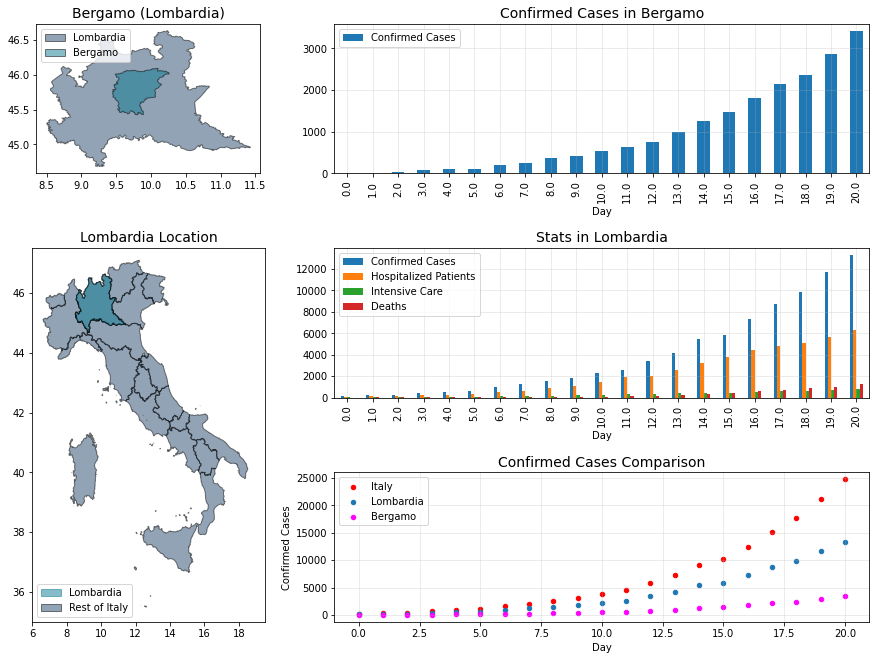

In [25]:
report_by_province("Bergamo")

Feel free to contribute and add some features

*Author: Simone Azeglio; email: simone.azeglio@edu.unito.it*